In [1]:
import cv2
import numpy as np
import sys
import matplotlib.pyplot as plt

In [2]:
def plot_img(img1, img2 = None):
    if img2 is None:
        plt.figure(num=None, figsize=(6, 6), dpi=100, facecolor='w', edgecolor='k')
        plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
        plt.show()
    else:
        fig = plt.figure(num=None, figsize=(8, 8), dpi=100, facecolor='w', edgecolor='k')

        fig.add_subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))

        fig.add_subplot(1, 2, 2)
        plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
        plt.show()

In [111]:
img = cv2.imread("image/1.jpg")
img = cv2.resize(img, (504, 304))
img2 = cv2.imread("image/2.jpg")
img2 = cv2.resize(img2, (504, 304))
img3 = cv2.imread("image/3.jpg")
img3 = cv2.resize(img3, (504, 304))

In [20]:
def click_Mouse(event, x, y, flags, param):
    global click_p
    if event == cv2.EVENT_LBUTTONUP:
        print(x, y)

cv2.namedWindow("vector")
cv2.setMouseCallback("vector", click_Mouse)
cv2.imshow("vector", img)
# ch = cv2.waitKey(1)
# if ch & 0xFF == ord('q'):
cv2.waitKey(0)
cv2.destroyAllWindows()   

(145, 272)
(317, 269)
(333, 80)
(172, 79)


In [19]:
# im_src = cv2.imread('book2.jpg')
# Four corners of the book in source image
pts_src = np.array([[141, 131], [480, 159], [493, 630],[64, 601]])


# Read destination image.
# im_dst = cv2.imread('book1.jpg')
# Four corners of the book in destination image.
pts_dst = np.array([[318, 256],[534, 372],[316, 670],[73, 473]])

# Calculate Homography
h, status = cv2.findHomography(pts_src, pts_dst)
# M = cv2.getPerspectiveTransform(pts_src, pts_dst)
print(h)
pts1 = np.float32([[141, 131], [480, 159], [493, 630],[64, 601]])
pts2 = np.float32([[318, 256],[534, 372],[316, 670],[73, 473]])

M = cv2.getPerspectiveTransform(pts1,pts2)
print(M)

# Warp source image to destination based on homography
# im_out = cv2.warpPerspective(img, h, (7000,7000))
# plot_img(img, im_out)

[[ 4.34043935e-01 -4.19622184e-01  2.91709494e+02]
 [ 1.46491654e-01  4.41418278e-01  1.61369294e+02]
 [-3.62463336e-04 -9.14274844e-05  1.00000000e+00]]
[[ 4.34043935e-01 -4.19622184e-01  2.91709494e+02]
 [ 1.46491654e-01  4.41418278e-01  1.61369294e+02]
 [-3.62463336e-04 -9.14274844e-05  1.00000000e+00]]


In [115]:
m_ = np.eye(3)
m_[0,2] = 0
m_[1,2] = 0

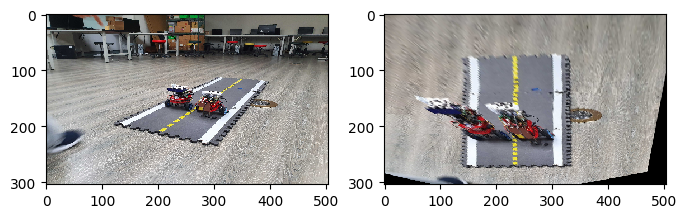

In [116]:
pts1 = np.float32([[125,196],[303,236],[399,121],[307,113]])
pts2 = np.float32([[145,272],[333,272],[333,80],[145,80]])
M = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(img, np.matmul(m_, M),(504, 304))
# shift = np.float32([[1, 0, x], [0, 1, y]])
# dst = cv2.warpAffine(dst, shift, (dst.shape[1], dst.shape[0]))
plot_img(img, dst)

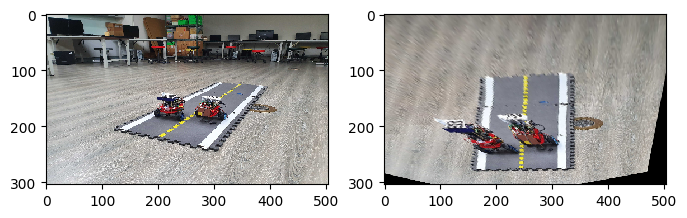

In [118]:
pts1 = np.float32([[125,196],[303,236],[399,121],[307,113]])
pts2 = np.float32([[145,272],[333,272],[333,80],[145,80]])
M = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(img3, np.matmul(m_, M),(504, 304))
# shift = np.float32([[1, 0, x], [0, 1, y]])
# dst = cv2.warpAffine(dst, shift, (dst.shape[1], dst.shape[0]))
plot_img(img3, dst)